## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
d = pd.read_json("/content/drive/My Drive/Fake news pro/fake and true stories/activity of fake stories.json",orient = 'split')
d2 = pd.read_json("/content/drive/My Drive/Fake news pro/fake and true stories/activity_true.json",orient = 'split')
d2.columns

Index(['cascade', 'label', 'Name', 'user_ID', 'timestamp', 'tweet_ID',
       'num_of_likes', 'list_friends', 'follower_count', 'friends_count',
       'favaurites_count', 'posts_per_day', 'verification', 'activity'],
      dtype='object')

In [ ]:

data = d.filter(items = ["cascade","label","user_ID","timestamp","num_of_likes","friends_count",
                         "follower_count","	posts_per_day","verification","activity","list_friends"])

data_true = d2.filter(items = ["cascade","label","user_ID","timestamp","num_of_likes","friends_count",
                         "follower_count","	posts_per_day","verification","activity","list_friends"])

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data[:10]

,cascade,label,user_ID,timestamp,num_of_likes,friends_count,follower_count,verification,activity,list_friends
0,0,False,4447380916,2020-06-09 17:50:35,807,76,326,0,5513.344431,"[3128214849, 1165182772216041473, 124024927039..."
1,0,False,790124868004118528,2020-06-09 18:12:12,0,242,30228,0,43083.723596,"[1219846015345483779, 1045960549970964480, 120..."
2,0,False,1111991608516530177,2020-06-09 18:13:48,0,301,426,0,25403.552573,"[1139491702056652801, 852788837319233536, 1219..."
3,0,False,1214938249535377408,2020-06-09 18:16:49,0,373,396,0,11845.484663,"[1235934281505165312, 1222960906096783361, 115..."
4,0,False,1082051731146661889,2020-06-09 18:18:14,0,292,244,0,13757.084906,"[1213470904631513088, 1236031504989458432, 114..."
5,0,False,1211598750843490306,2020-06-09 18:18:16,0,33,139,0,4507.761628,"[1022184805063188481, 1215989762860965888, 998..."
6,0,False,1217119801115643905,2020-06-09 18:21:40,0,338,155,0,3710.764331,"[1225054746396020736, 904698499345899520, 8439..."
7,0,False,1226085175404220420,2020-06-09 18:22:37,0,1154,862,0,8165.659091,"[1245657117379321861, 1249632649800548353, 121..."
8,0,False,1056963729114480640,2020-06-09 18:24:44,0,1071,773,0,15459.928214,"[830191063772053504, 840534528850575360, 12651..."
9,0,False,1131436539408474114,2020-06-09 18:26:23,0,77,609,0,26163.335878,"[827552393822949378, 1097931420834693127, 1094..."


## Time fixer

In [ ]:
import datetime
from datetime import timedelta


# some needed variables
data_cascade=data["cascade"].tolist()
data_cascade_true = data_true['cascade'].tolist()
max_cascade_id=max(data_cascade)
max_cascade_id_true = max(data_cascade_true)
date_time_format = '%Y-%m-%d %H:%M:%S'
print(max_cascade_id, max_cascade_id_true)
exception_array = [19,44,88,96,97,98,99,107]
data_time=data['timestamp'].tolist()
data_time_true = data_true['timestamp'].tolist()

#####find the dt between two times in the below format in seconds


def time_finder(min_time,time,date_time_format):
  d_t=datetime.datetime.strptime(str(time), date_time_format)- datetime.datetime.strptime(str(min_time), date_time_format)
  return d_t.seconds/60

####turns times to dt from cascades's root for each data in each cascade



def time_fixer(iteration_num,exception_array, data_time, data_cascade):
  for i in range(0, iteration_num+1):
    print(i)
    if not(i in exception_array):
      data_cascade=np.array(data_cascade)
      data_time=np.array(data_time)
      mask=data_cascade==i
      data_time_i=data_time[mask]
      print(data_time_i)
      min_time=min(data_time_i)
      print(min_time)
      data_time_i=[time_finder(min_time,time,date_time_format) for time in data_time_i]
      data_time[mask]=data_time_i
  return data_time

data['timestamp'] = time_fixer(max_cascade_id, exception_array, data_time, data_cascade)
data_true['timestamp'] = time_fixer(max_cascade_id_true, exception_array, data_time_true, data_cascade_true)

18 14
0
[Timestamp('2020-06-09 17:50:35') Timestamp('2020-06-09 18:12:12')
 Timestamp('2020-06-09 18:13:48') Timestamp('2020-06-09 18:16:49')
 Timestamp('2020-06-09 18:18:14') Timestamp('2020-06-09 18:18:16')
 Timestamp('2020-06-09 18:21:40') Timestamp('2020-06-09 18:22:37')
 Timestamp('2020-06-09 18:24:44') Timestamp('2020-06-09 18:26:23')
 Timestamp('2020-06-09 18:29:04') Timestamp('2020-06-09 18:38:39')
 Timestamp('2020-06-09 18:39:26') Timestamp('2020-06-09 18:41:06')
 Timestamp('2020-06-09 18:53:41') Timestamp('2020-06-09 18:53:49')
 Timestamp('2020-06-09 19:06:56') Timestamp('2020-06-09 19:10:07')
 Timestamp('2020-06-09 19:14:19') Timestamp('2020-06-09 19:35:16')
 Timestamp('2020-06-09 19:47:10') Timestamp('2020-06-09 19:54:45')
 Timestamp('2020-06-09 20:05:38') Timestamp('2020-06-09 20:09:49')
 Timestamp('2020-06-09 20:22:26') Timestamp('2020-06-09 21:28:13')
 Timestamp('2020-06-09 21:29:20') Timestamp('2020-06-09 21:35:30')
 Timestamp('2020-06-10 02:49:38') Timestamp('2020-06-1

In [ ]:
data_true[:10]

,cascade,label,user_ID,timestamp,num_of_likes,friends_count,follower_count,verification,activity,list_friends
0,0,True,2509360928,0,80,4,153769,1,153798.927027,"[1270610996919521280, 1829301998, 2749166090, ..."
1,0,True,941220112845164544,1.75,0,2723,26126,0,397969.398472,"[1270832055526580228, 1191002589372067842, 126..."
2,0,True,1246157111215652866,4.61667,0,51,154,0,4862.066667,"[1242129436461465605, 1103510455, 100659233584..."
3,0,True,1247212523922866176,6.43333,0,378,347,0,10161.222222,"[1263815903248109570, 1249589740514480135, 800..."
4,0,True,817276800233537536,13.0667,0,4999,3401,0,53748.250397,"[1062643675111583745, 1247988970237067265, 119..."
5,0,True,1242901732738437126,22.9,0,929,547,0,8356.428571,"[1152855786051317766, 1213044183797157890, 334..."
6,0,True,2520727911,103.75,0,103,141,0,7746.155427,"[1137337365909970944, 1268511165904232448, 852..."
7,0,True,1213157339093557249,204.033,0,138,135,0,8866.518072,"[1260385397064060928, 1248990115076210692, 291..."
8,0,True,898613918612033536,603.9,0,839,46,0,1023.323017,"[1111982082190921734, 943148768827969542, 2785..."
9,0,True,1193762046447370240,167.9,0,148,105,0,851.584475,"[2509360928, 1259843996, 1244523126408589313, ..."


In [ ]:
data[:10]

,cascade,label,user_ID,timestamp,num_of_likes,friends_count,follower_count,verification,activity,list_friends
0,0,False,4447380916,0,807,76,326,0,5513.344431,"[3128214849, 1165182772216041473, 124024927039..."
1,0,False,790124868004118528,21.6167,0,242,30228,0,43083.723596,"[1219846015345483779, 1045960549970964480, 120..."
2,0,False,1111991608516530177,23.2167,0,301,426,0,25403.552573,"[1139491702056652801, 852788837319233536, 1219..."
3,0,False,1214938249535377408,26.2333,0,373,396,0,11845.484663,"[1235934281505165312, 1222960906096783361, 115..."
4,0,False,1082051731146661889,27.65,0,292,244,0,13757.084906,"[1213470904631513088, 1236031504989458432, 114..."
5,0,False,1211598750843490306,27.6833,0,33,139,0,4507.761628,"[1022184805063188481, 1215989762860965888, 998..."
6,0,False,1217119801115643905,31.0833,0,338,155,0,3710.764331,"[1225054746396020736, 904698499345899520, 8439..."
7,0,False,1226085175404220420,32.0333,0,1154,862,0,8165.659091,"[1245657117379321861, 1249632649800548353, 121..."
8,0,False,1056963729114480640,34.15,0,1071,773,0,15459.928214,"[830191063772053504, 840534528850575360, 12651..."
9,0,False,1131436539408474114,35.8,0,77,609,0,26163.335878,"[827552393822949378, 1097931420834693127, 1094..."


## Sort the data

In [ ]:
print(f'this is for false: \n {data["timestamp"]}')
print(f'this is for true: \n {data_true["timestamp"]}')

this is for false: 
 0            0
1      21.6167
2      23.2167
3      26.2333
4        27.65
        ...   
942    1358.52
943    175.817
944    328.267
945    1208.95
946    579.283
Name: timestamp, Length: 947, dtype: object
this is for true: 
 0             0
1          1.75
2       4.61667
3       6.43333
4       13.0667
         ...   
1211     627.15
1212    664.667
1213    707.133
1214    357.167
1215    416.733
Name: timestamp, Length: 1216, dtype: object


In [ ]:
data["timestamp"]=data["timestamp"].astype(str).astype(float)
data_true["timestamp"]=data_true["timestamp"].astype(str).astype(float)

print(f'this is for false: \n {data["timestamp"]}')
print(f'this is for true: \n {data_true["timestamp"]}')

this is for false: 
 0         0.000000
1        21.616667
2        23.216667
3        26.233333
4        27.650000
          ...     
942    1358.516667
943     175.816667
944     328.266667
945    1208.950000
946     579.283333
Name: timestamp, Length: 947, dtype: float64
this is for true: 
 0         0.000000
1         1.750000
2         4.616667
3         6.433333
4        13.066667
           ...    
1211    627.150000
1212    664.666667
1213    707.133333
1214    357.166667
1215    416.733333
Name: timestamp, Length: 1216, dtype: float64


In [ ]:
 data.sort_values(by=['cascade','timestamp'], inplace=True)
 data_true.sort_values(by=['cascade','timestamp'], inplace=True)


In [ ]:
data.reset_index(inplace=True,drop=True)
data_true.reset_index(inplace=True, drop=True)
data[:10]

,cascade,label,user_ID,timestamp,num_of_likes,friends_count,follower_count,verification,activity,list_friends
0,0,False,4447380916,0.000000,807,76,326,0,5513.344431,"[3128214849, 1165182772216041473, 124024927039..."
1,0,False,790124868004118528,21.616667,0,242,30228,0,43083.723596,"[1219846015345483779, 1045960549970964480, 120..."
2,0,False,1111991608516530177,23.216667,0,301,426,0,25403.552573,"[1139491702056652801, 852788837319233536, 1219..."
3,0,False,1214938249535377408,26.233333,0,373,396,0,11845.484663,"[1235934281505165312, 1222960906096783361, 115..."
4,0,False,1082051731146661889,27.650000,0,292,244,0,13757.084906,"[1213470904631513088, 1236031504989458432, 114..."
5,0,False,1211598750843490306,27.683333,0,33,139,0,4507.761628,"[1022184805063188481, 1215989762860965888, 998..."
6,0,False,816950931749277696,30.700000,0,235,197,0,9155.722443,"[984482732427399169, 916035752592597001, 12366..."
7,0,False,1217119801115643905,31.083333,0,338,155,0,3710.764331,"[1225054746396020736, 904698499345899520, 8439..."
8,0,False,1226085175404220420,32.033333,0,1154,862,0,8165.659091,"[1245657117379321861, 1249632649800548353, 121..."
9,0,False,1056963729114480640,34.150000,0,1071,773,0,15459.928214,"[830191063772053504, 840534528850575360, 12651..."


## Find the root for each cascade and parentroot for each tweet

In [ ]:
parent_root=[]
parent_root_true=[]
data_cascade=data["cascade"].tolist()
data_cascade_true=data_true["cascade"].tolist()
max_cascade_id_true=max(data_cascade_true)
max_cascade_id=max(data_cascade)
data_id=data["user_ID"].tolist()
data_id_true=data_true["user_ID"].tolist()
data_followings=data["list_friends"].tolist()
data_followings_true=data_true["list_friends"].tolist()


def root_parent_finder(iteration_num,exception_array, data_cascade,data_followings,data_id):
  parent_root = []
  for i in range(0,iteration_num+1):
    if not(i in exception_array):
      data_cascade=np.array(data_cascade)
      data_id=np.array(data_id)
      data_followings=np.array(data_followings)
      mask=data_cascade==i
      data_id_i=data_id[mask]
      data_followings_i=data_followings[mask]

      for j in range(len(data_id_i)):
        babo=-1
        if j==0:
          parent_root.append(-1)####means that it is the root of cascade so doesn't have a parent root
          print()

        else:
          for k in range(j-1,-1,-1):
            if data_id_i[k] in data_followings_i[j]:
              babo=k
              parent_root.append(k)
              break
          if babo==-1:
            parent_root.append(0)
  return parent_root



data['parent_root'] = root_parent_finder(iteration_num = max_cascade_id, exception_array = exception_array,data_cascade=data_cascade,data_followings=data_followings, data_id=data_id)
data_true['parent_root'] = root_parent_finder(iteration_num=max_cascade_id_true, exception_array=exception_array, data_cascade = data_cascade_true,data_followings=data_followings_true, data_id=data_id_true)
parent_root = data['parent_root']
parent_root_true = data_true['parent_root']


In [ ]:
print(len(parent_root),len(parent_root_true))
print(len(data["cascade"]), len(data_true['cascade']))

947 1216
947 1216


In [ ]:
data_true[:10]

,cascade,label,user_ID,timestamp,num_of_likes,friends_count,follower_count,verification,activity,list_friends,parent_root
0,0,True,2509360928,0.000000,80,4,153769,1,153798.927027,"[1270610996919521280, 1829301998, 2749166090, ...",-1
1,0,True,941220112845164544,1.750000,0,2723,26126,0,397969.398472,"[1270832055526580228, 1191002589372067842, 126...",0
2,0,True,1246157111215652866,4.616667,0,51,154,0,4862.066667,"[1242129436461465605, 1103510455, 100659233584...",0
3,0,True,1247212523922866176,6.433333,0,378,347,0,10161.222222,"[1263815903248109570, 1249589740514480135, 800...",0
4,0,True,817276800233537536,13.066667,0,4999,3401,0,53748.250397,"[1062643675111583745, 1247988970237067265, 119...",1
5,0,True,1242901732738437126,22.900000,0,929,547,0,8356.428571,"[1152855786051317766, 1213044183797157890, 334...",1
6,0,True,2520727911,103.750000,0,103,141,0,7746.155427,"[1137337365909970944, 1268511165904232448, 852...",0
7,0,True,1193762046447370240,167.900000,0,148,105,0,851.584475,"[2509360928, 1259843996, 1244523126408589313, ...",0
8,0,True,1213157339093557249,204.033333,0,138,135,0,8866.518072,"[1260385397064060928, 1248990115076210692, 291...",0
9,0,True,898613918612033536,603.900000,0,839,46,0,1023.323017,"[1111982082190921734, 943148768827969542, 2785...",0


## The Graph and it's analysis

In [ ]:
data_cascade=data["cascade"].tolist()
max_cascade_id=max(data_cascade)
data_label=data["label"].tolist()
data_id=data["user_ID"].tolist()
data_followings=data["list_friends"].tolist()
data_time=data["timestamp"].tolist()
data_parentroot=data["parent_root"].tolist()

data_followernum=data["follower_count"].tolist()
data_friendnum=data["friends_count"].tolist()
data_likes=data["num_of_likes"].tolist()
data_verification=data["verification"].tolist()

data_activity=data["activity"].tolist()

data_cascade=np.array(data_cascade)
data_id=np.array(data_id)
data_time=np.array(data_time)
data_followings=np.array(data_followings)
data_parentroot=np.array(data_parentroot)
data_label=np.array(data_label)
data_followernum=np.array(data_followernum)
data_friendnum=np.array(data_friendnum)
data_likes=np.array(data_likes)
data_activity=np.array(data_activity)
data_verification=np.array(data_verification)

In [ ]:
data_cascade_true=data_true["cascade"].tolist()
max_cascade_id_true=max(data_cascade_true)
data_label_true=data_true["label"].tolist()
data_id_true=data_true["user_ID"].tolist()
data_followings_true=data_true["list_friends"].tolist()
data_time_true=data_true["timestamp"].tolist()
data_parentroot_true=data_true["parent_root"].tolist()

data_followernum_true=data_true["follower_count"].tolist()
data_friendnum_true=data_true["friends_count"].tolist()
data_likes_true=data_true["num_of_likes"].tolist()
data_verification_true=data_true["verification"].tolist()

data_activity_true=data_true["activity"].tolist()

data_cascade_true=np.array(data_cascade_true)
data_id_true=np.array(data_id_true)
data_time_true=np.array(data_time_true)
data_followings_true=np.array(data_followings_true)
data_parentroot_true=np.array(data_parentroot_true)
data_label_true=np.array(data_label_true)
data_followernum_true=np.array(data_followernum_true)
data_friendnum_true=np.array(data_friendnum_true)
data_likes_true=np.array(data_likes_true)
data_activity_true=np.array(data_activity_true)
data_verification_true=np.array(data_verification_true)

In [ ]:
graph_analysis = []


def graph_maker(iteration_num,exception_array, data_cascade, data_id, data_time, data_parentroot, data_followings, data_label, data_followernum, data_friendnum,data_likes, data_activity,data_verification):
  graph_analysis=[]

  for i in range(0,iteration_num+1):
    if not(i in exception_array):

      mask=data_cascade==i
      data_id_i=data_id[mask]
      data_time_i=data_time[mask]
      data_parentroot_i=data_parentroot[mask]
      data_followings_i=data_followings[mask]
      data_label_i=data_label[mask]
      data_followernum_i=data_followernum[mask]
      data_friendnum_i=data_friendnum[mask]
      data_likes_i=data_likes[mask]
      data_activity_i=data_activity[mask]
      data_verification_i=data_verification[mask]

      graph=nx.DiGraph()
      depth_activity=[]
      for j in range(len(data_id_i)):
        graph.add_node(data_id_i[j],date=data_time_i[j],label=data_label_i[j],activity=data_activity_i[j],
        is_root=True if data_parentroot_i[j]==-1 else False,is_verified=True if data_verification_i[j]==1 else False )
        if data_parentroot_i[j]!=-1:
          parentroot_num=data_parentroot_i[j]
          graph.add_edge(data_id_i[parentroot_num],data_id_i[j]) 
  ###########analysis#############
      depth=nx.eccentricity(graph,v=data_id_i[0])

      size=graph.number_of_nodes()

      if size==1:
        structural_viralty=0
      else:
        structural_viralty=nx.average_shortest_path_length(graph)
    
      likes=np.mean(data_likes_i)

    
      graph_analysis.append([i,size,depth,structural_viralty,likes,data_label_i[0],graph])

  return graph_analysis


graph_analysis = graph_maker(max_cascade_id,exception_array, data_cascade, data_id, data_time, data_parentroot, data_followings, data_label, data_followernum, data_friendnum,data_likes, data_activity,data_verification)
graph_analysis_true = graph_maker(max_cascade_id_true,exception_array, data_cascade_true, data_id_true, data_time_true, data_parentroot_true, data_followings_true, data_label_true, data_followernum_true, data_friendnum_true,data_likes_true, data_activity_true,data_verification_true)


In [ ]:
print(graph_analysis_true[:5])
print(graph_analysis[:5])

[[0, 10, 2, 0.14444444444444443, 8.0, True, <networkx.classes.digraph.DiGraph object at 0x7f4a04e08780>], [1, 88, 5, 0.020768025078369907, 82.55681818181819, True, <networkx.classes.digraph.DiGraph object at 0x7f4a066d0be0>], [2, 89, 5, 0.03958120531154239, 8.134831460674157, True, <networkx.classes.digraph.DiGraph object at 0x7f4a066d0c50>], [3, 10, 2, 0.14444444444444443, 18.7, True, <networkx.classes.digraph.DiGraph object at 0x7f4a066d0cc0>], [4, 87, 7, 0.03434910451750869, 8.770114942528735, True, <networkx.classes.digraph.DiGraph object at 0x7f4a066d0d30>]]
[[0, 89, 9, 0.1437691521961185, 9.067415730337078, False, <networkx.classes.digraph.DiGraph object at 0x7f4a04e08748>], [1, 90, 8, 0.07677902621722846, 9.955555555555556, False, <networkx.classes.digraph.DiGraph object at 0x7f49ffd974a8>], [2, 10, 2, 0.16666666666666666, 6.3, False, <networkx.classes.digraph.DiGraph object at 0x7f4a04e11b70>], [3, 100, 6, 0.03080808080808081, 27.25, False, <networkx.classes.digraph.DiGraph obj

In [ ]:
data_analysis = pd.DataFrame(graph_analysis,columns = ["cascade","size","depth","structural_viralty","mean_likes","label","graph"])
data_analysis_true = pd.DataFrame(graph_analysis_true,columns=["cascade","size","depth","structural_viralty","mean_likes","label","graph"])

In [ ]:
print(data_analysis_true[:20])
data_analysis_true[:40]


    cascade  size  ...  label                                              graph
0         0    10  ...   True  (2509360928, 941220112845164544, 1246157111215...
1         1    88  ...   True  (905153715245637634, 837294901473722368, 96243...
2         2    89  ...   True  (4871323491, 778756220, 1964664444, 7319660908...
3         3    10  ...   True  (919575423809409024, 823993846115790850, 22833...
4         4    87  ...   True  (6135642, 2242429244, 943659883928289281, 8189...
5         5    87  ...   True  (6135642, 739452878893506560, 9194794569931038...
6         6    99  ...   True  (6135642, 1067070092670836739, 747820691924336...
7         7    95  ...   True  (6135642, 984185871023919104, 1081113117097111...
8         8    88  ...   True  (6135642, 3165731224, 947476966747394048, 7329...
9         9    93  ...   True  (6135642, 1135949550903005185, 122473299469237...
10       10    95  ...   True  (6135642, 1173658125993267201, 115915387512074...
11       11    99  ...   Tru

,cascade,size,depth,structural_viralty,mean_likes,label,graph
0,0,10,2,0.144444,8.000000,True,"(2509360928, 941220112845164544, 1246157111215..."
1,1,88,5,0.020768,82.556818,True,"(905153715245637634, 837294901473722368, 96243..."
2,2,89,5,0.039581,8.134831,True,"(4871323491, 778756220, 1964664444, 7319660908..."
3,3,10,2,0.144444,18.700000,True,"(919575423809409024, 823993846115790850, 22833..."
4,4,87,7,0.034349,8.770115,True,"(6135642, 2242429244, 943659883928289281, 8189..."
5,5,87,3,0.019246,7.241379,True,"(6135642, 739452878893506560, 9194794569931038..."
6,6,99,17,0.268604,4.250000,True,"(6135642, 1067070092670836739, 747820691924336..."
7,7,95,7,0.042329,5.589474,True,"(6135642, 984185871023919104, 1081113117097111..."
8,8,88,5,0.024295,10.511364,True,"(6135642, 3165731224, 947476966747394048, 7329..."
9,9,93,3,0.012740,11.645161,True,"(6135642, 1135949550903005185, 122473299469237..."


In [ ]:
def mean_calculator(entry_array):
  return sum(entry_array)/len(entry_array)

mean_size_true = mean_calculator(data_analysis_true['size'])
mean_depth_true = mean_calculator(data_analysis_true['depth'])
mean_structural_viralty_true = mean_calculator(data_analysis_true['structural_viralty'])
mean_mean_likes_true = mean_calculator(data_analysis_true['mean_likes'])
mean_size = mean_calculator(data_analysis['size'])
mean_depth = mean_calculator(data_analysis['depth'])
mean_structural_viralty = mean_calculator(data_analysis['structural_viralty'])
mean_mean_likes= mean_calculator(data_analysis['mean_likes'])

print(mean_size_true,mean_depth_true, mean_structural_viralty_true,mean_mean_likes_true)
print(mean_size, mean_depth, mean_structural_viralty, mean_mean_likes)

  

81.0 5.8 0.0626384787677282 16.75693252682749
49.68421052631579 4.842105263157895 0.10487423287415944 17.74659064732629


In [ ]:
from networkx.drawing.nx_agraph import graphviz_layout

#what is l ??? :)
def plot_graph(g,l):

  plt.figure(figsize =(7, 4))

  node_color = [nx.get_node_attributes(g, 'activity')[v] for v in g]  


  root=[]
  verified=[]
  verifiedcolor=[]
  for v in g:
    if nx.get_node_attributes(g, 'is_root')[v]==True:
      root.append(v)
      rootcolor=nx.get_node_attributes(g, 'activity')[v]
    if nx.get_node_attributes(g, 'is_verified')[v]==True:
      verified.append(v)
      if nx.get_node_attributes(g, 'is_root')[v]==False:
        verifiedcolor.append(nx.get_node_attributes(g, 'activity')[v])
      else:
        verifiedcolor.append(0.1)
  nodePos =nx.fruchterman_reingold_layout(g)
  paths=nx.single_source_shortest_path_length(g,root[-1])
  depth_path=[]
  for v in g:
    one=nx.get_node_attributes(g, 'activity')[v]
    two=paths[v]
    depth_path.append([two,one])

  nc=nx.draw_networkx(g,pos=nodePos,node_color = node_color,vmin=min(node_color), vmax=max(node_color),
                  with_labels = False, edge_color ='.4', node_size=35,cmap = plt.cm.rainbow) 


  nx.draw_networkx_nodes(g,pos=nodePos,nodelist=root,node_color=rootcolor,vmin=min(node_color), vmax=max(node_color),node_shape ="s",node_size=50,cmap=plt.cm.rainbow)
  nx.draw_networkx_nodes(g,pos=nodePos,nodelist=verified,node_color=verifiedcolor,vmin=min(node_color), vmax=max(node_color),node_shape ="d",node_size=50,cmap=plt.cm.rainbow)

  sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
  sm.set_array([])
  cbar = plt.colorbar(sm)
  # plt.text(1.8,0.2,f"square node--> root\ndiamond node-->verified\nlabel={l}")
  plt.tight_layout()


  mean_activity=[]
  depth_path=np.array(depth_path)
  maxi=int(np.max(depth_path[:,0]))
  for y in range(0,maxi+1):
    mask_d=depth_path[:,0]==y
    z=depth_path[:,1]
    if len(z[mask_d])!=0:
      mean_activity.append([y,np.mean(z[mask_d])])
  return mean_activity




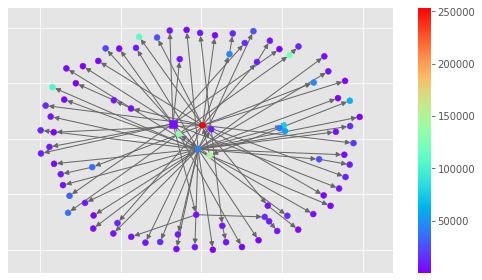

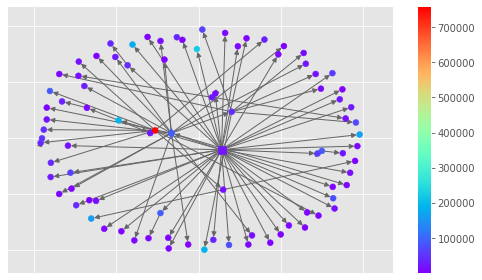

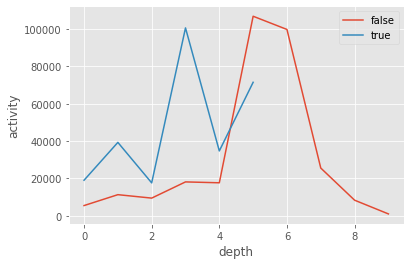

In [ ]:
path=plot_graph(g=data_analysis["graph"][0],l=data_analysis["label"][0])
path_true=plot_graph(g=data_analysis_true["graph"][2],l=data_analysis_true["label"][2])
 
#plot_graph(g=data_analysis["graph"][1],l=data_analysis["label"][1])
#plot_graph(g=data_analysis["graph"][11],l=data_analysis["label"][11])
#plot_graph(g=data_analysis["graph"][9],l=data_analysis["label"][9])
#path=nx.shortest_path_length(data_analysis["graph"][0],1691574356,984418022327808000)
plt.show()

path=np.array(path)
path_true=np.array(path_true)
plt.plot(path[:,0],path[:,1],label='false')
plt.xlabel("depth")
plt.ylabel("activity")
plt.plot(path_true[:,0],path_true[:,1], label='true')
plt.xlabel("depth")
plt.ylabel("activity")
plt.legend()

plt.show()

In [ ]:
data_analysis2 = data_analysis
path2 = path
data_analysis_true2 = data_analysis_true
path_true2 = path_true

In [ ]:
mask1=data_analysis["label"]==False
mask2=data_analysis_true['label']==True
#mask2=data_analysis["label"]==2
#mask3=data_analysis["label"]==3
#mask4=data_analysis["label"]==4
mask2

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
Name: label, dtype: bool

In [ ]:
print(data_analysis_true['size'][mask2])

0     10
1     88
2     89
3     10
4     87
5     87
6     99
7     95
8     88
9     93
10    95
11    99
12    92
13    92
14    91
Name: size, dtype: int64


0      89
1      90
2      10
3     100
4       8
5       7
6       8
7      39
8      63
9      21
10     65
11     49
12     90
13     12
14     23
15     25
16     99
17     50
18     96
Name: size, dtype: int64


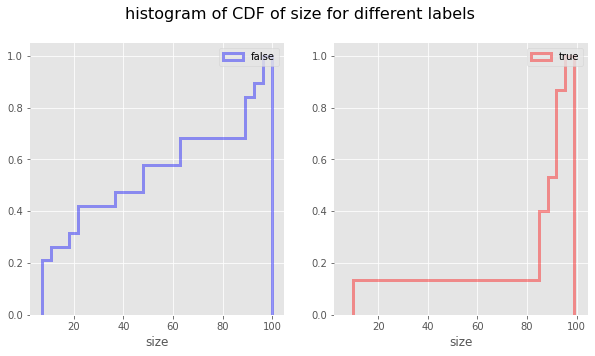

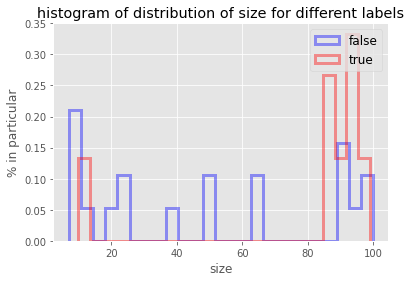

In [ ]:
import seaborn as sns
print(data_analysis["size"][mask1])
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)
f.suptitle('histogram of CDF of size for different labels', fontsize=16)
sns.distplot(data_analysis["size"][mask1],ax=axes[0],bins=25,color="b",kde=False,label="false",
             hist_kws={"histtype": "step","linewidth": 3,"cumulative":True,'weights': np.full(len(data_analysis["size"][mask1]), 1/len(data_analysis["size"][mask1]))})
axes[0].legend()

sns.distplot(data_analysis_true["size"][mask2],ax=axes[1],bins=25,color="r",kde=False,label="true",
             hist_kws={"histtype": "step","linewidth": 3,"cumulative":True,'weights': np.full(len(data_analysis_true["size"][mask2]), 1/len(data_analysis_true["size"][mask2]))})
axes[1].legend()
'''
sns.distplot(data_analysis["size"][mask3],ax=axes[1,0],bins=25,color="g",kde=False,label="art",
             hist_kws={"cumulative":True,'weights': np.full(len(data_analysis["size"][mask3]), 1/len(data_analysis["size"][mask3]))})
axes[1,0].legend()
sns.distplot(data_analysis["size"][mask4],ax=axes[1,1],bins=25,color="c",kde=False,label="social",
             hist_kws={"cumulative":True,'weights': np.full(len(data_analysis["size"][mask4]), 1/len(data_analysis["size"][mask4]))})
axes[1,1].legend()
'''
plt.show()

# f.title('histogram of CDF of size for different labels', fontsize=16)
sns.distplot(data_analysis["size"][mask1],bins=25,color="b",kde=False,label="false",
             hist_kws={"histtype": "step","linewidth": 3,'weights': np.full(len(data_analysis["size"][mask1]), 1/len(data_analysis["size"][mask1]))})

sns.distplot(data_analysis_true["size"][mask2],bins=25,color="r",kde=False,label="true",
             hist_kws={"histtype": "step","linewidth": 3,'weights': np.full(len(data_analysis_true["size"][mask2]), 1/len(data_analysis_true["size"][mask2]))})
plt.legend(prop={'size': 12})
plt.title('histogram of distribution of size for different labels')
plt.xlabel('size')
plt.ylabel('% in particular') 
plt.show()


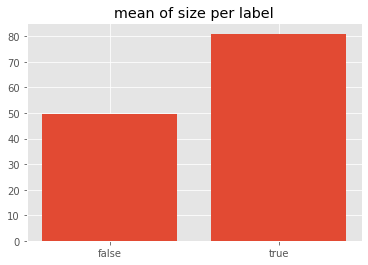

In [ ]:
y=[]
y.append(sum(data_analysis["size"][mask1])/len(data_analysis["size"][mask1]))
y.append(sum(data_analysis_true["size"][mask2])/len(data_analysis_true["size"][mask2]))
#y.append(sum(data_analysis["size"][mask3])/len(data_analysis["size"][mask3]))
#y.append(sum(data_analysis["size"][mask4])/len(data_analysis["size"][mask4]))
x=["false","true"]

plt.title("mean of size per label")
plt.bar(x,y)
plt.show()


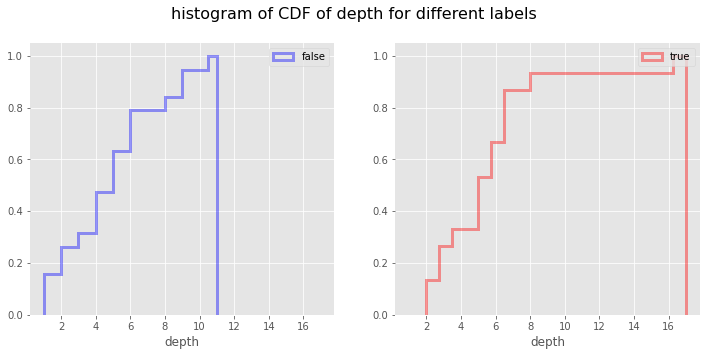

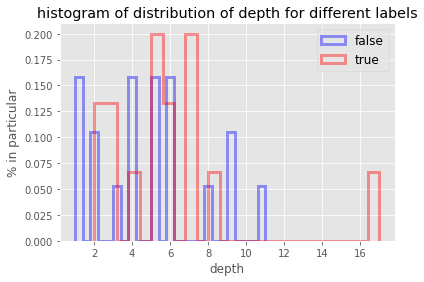

In [ ]:
import seaborn as sns
f, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
sns.despine(left=True)
f.suptitle('histogram of CDF of depth for different labels', fontsize=16)
sns.distplot(data_analysis["depth"][mask1],ax=axes[0],bins=20,color="b",kde=False,label="false",
             hist_kws={"histtype": "step","linewidth": 3,"cumulative":True,'weights': np.full(len(data_analysis["depth"][mask1]), 1/len(data_analysis["depth"][mask1]))})
axes[0].legend()

sns.distplot(data_analysis_true["depth"][mask2],ax=axes[1],bins=20,color="r",kde=False,label="true",
             hist_kws={"histtype": "step","linewidth": 3,"cumulative":True,'weights': np.full(len(data_analysis_true["depth"][mask2]), 1/len(data_analysis_true["depth"][mask2]))})
axes[1].legend()
'''
sns.distplot(data_analysis["depth"][mask3],ax=axes[1,0],bins=20,color="g",kde=False,label="art",
             hist_kws={"cumulative":True,'weights': np.full(len(data_analysis["depth"][mask3]), 1/len(data_analysis["depth"][mask3]))})
axes[1,0].legend()
sns.distplot(data_analysis["depth"][mask4],ax=axes[1,1],bins=20,color="c",kde=False,label="social",
             hist_kws={"cumulative":True,'weights': np.full(len(data_analysis["depth"][mask4]), 1/len(data_analysis["depth"][mask4]))})
axes[1,1].legend()
'''
plt.show()


sns.distplot(data_analysis["depth"][mask1],bins=25,color="b",kde=False,label="false",
             hist_kws={"histtype": "step","linewidth": 3,'weights': np.full(len(data_analysis["depth"][mask1]), 1/len(data_analysis["depth"][mask1]))})

sns.distplot(data_analysis_true["depth"][mask2],bins=25,color="r",kde=False,label="true",
             hist_kws={"histtype": "step","linewidth": 3,'weights': np.full(len(data_analysis_true["depth"][mask2]), 1/len(data_analysis_true["depth"][mask2]))})
plt.legend(prop={'size': 12})
plt.title('histogram of distribution of depth for different labels')
plt.xlabel('depth')
plt.ylabel('% in particular') 
plt.show()

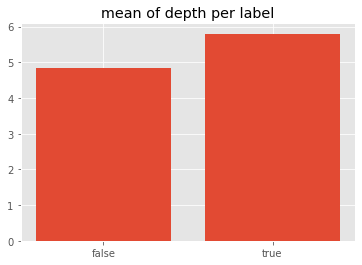

In [ ]:
y=[]
y.append(sum(data_analysis["depth"][mask1])/len(data_analysis["size"][mask1]))
y.append(sum(data_analysis_true["depth"][mask2])/len(data_analysis_true["size"][mask2]))
#y.append(sum(data_analysis["depth"][mask3])/len(data_analysis["size"][mask3]))
#y.append(sum(data_analysis["depth"][mask4])/len(data_analysis["size"][mask4]))
x=["false","true"]
plt.title("mean of depth per label")
plt.bar(x,y)
plt.show()

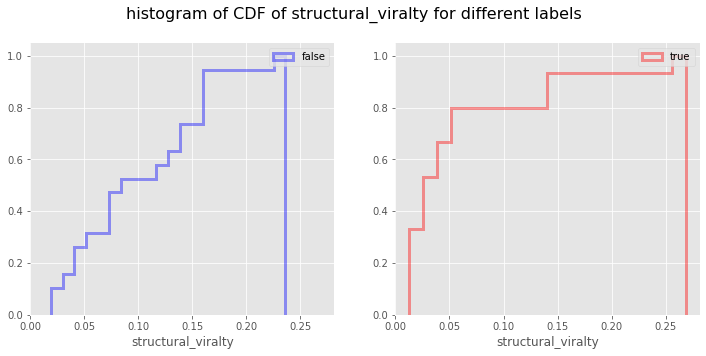

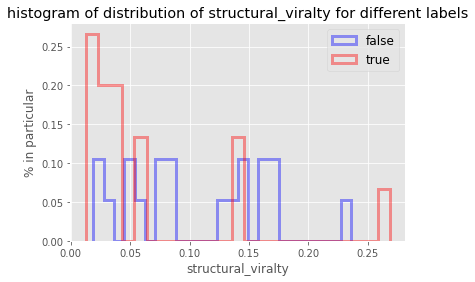

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
sns.despine(left=True)
f.suptitle('histogram of CDF of structural_viralty for different labels', fontsize=16)

sns.distplot(data_analysis["structural_viralty"][mask1],ax=axes[0],bins=20,color="b",kde=False,label="false",
             hist_kws={"histtype": "step","linewidth": 3,"cumulative":True,'weights': np.full(len(data_analysis["structural_viralty"][mask1]), 1/len(data_analysis["structural_viralty"][mask1]))})
axes[0].legend()

sns.distplot(data_analysis_true["structural_viralty"][mask2],ax=axes[1],bins=20,color="r",kde=False,label="true",
             hist_kws={"histtype": "step","linewidth": 3,"cumulative":True,'weights': np.full(len(data_analysis_true["structural_viralty"][mask2]), 1/len(data_analysis_true["structural_viralty"][mask2]))})
axes[1].legend()
plt.show()

sns.distplot(data_analysis["structural_viralty"][mask1],bins=25,color="b",kde=False,label="false",
             hist_kws={"histtype": "step","linewidth": 3,'weights': np.full(len(data_analysis["structural_viralty"][mask1]), 1/len(data_analysis["structural_viralty"][mask1]))})

sns.distplot(data_analysis_true["structural_viralty"][mask2],bins=25,color="r",kde=False,label="true",
             hist_kws={"histtype": "step","linewidth": 3,'weights': np.full(len(data_analysis_true["structural_viralty"][mask2]), 1/len(data_analysis_true["structural_viralty"][mask2]))})
plt.legend(prop={'size': 12})
plt.title('histogram of distribution of structural_viralty for different labels')
plt.xlabel('structural_viralty')
plt.ylabel('% in particular') 
plt.show()


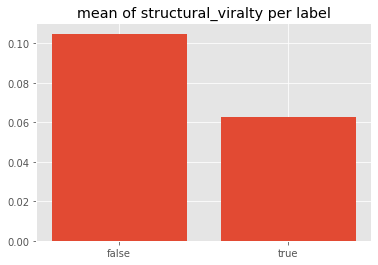

In [ ]:
y=[]
y.append(sum(data_analysis["structural_viralty"][mask1])/len(data_analysis["size"][mask1]))
y.append(sum(data_analysis_true["structural_viralty"][mask2])/len(data_analysis_true["size"][mask2]))
#y.append(sum(data_analysis["structural_viralty"][mask3])/len(data_analysis["size"][mask3]))
#y.append(sum(data_analysis["structural_viralty"][mask4])/len(data_analysis["size"][mask4]))
x=["false","true"]
plt.title("mean of structural_viralty per label")
plt.bar(x,y)
plt.show()

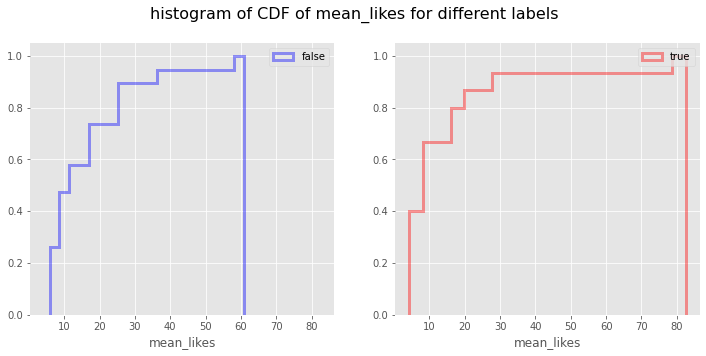

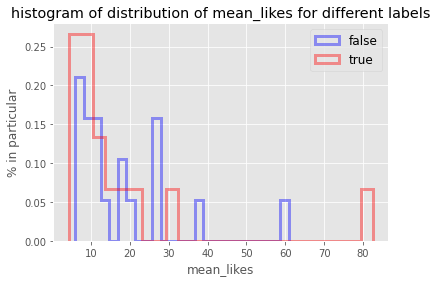

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
sns.despine(left=True)
f.suptitle('histogram of CDF of mean_likes for different labels', fontsize=16)

sns.distplot(data_analysis["mean_likes"][mask1],ax=axes[0],bins=20,color="b",kde=False,label="false",
             hist_kws={"histtype": "step","linewidth": 3,"cumulative":True,'weights': np.full(len(data_analysis["structural_viralty"][mask1]), 1/len(data_analysis["mean_likes"][mask1]))})
axes[0].legend()

sns.distplot(data_analysis_true["mean_likes"][mask2],ax=axes[1],bins=20,color="r",kde=False,label="true",
             hist_kws={"histtype": "step","linewidth": 3,"cumulative":True,'weights': np.full(len(data_analysis_true["mean_likes"][mask2]), 1/len(data_analysis_true['mean_likes'][mask2]))})
axes[1].legend()
'''
sns.distplot(data_analysis["structural_viralty"][mask3],ax=axes[1,0],bins=20,color="g",kde=False,label="art",
             hist_kws={"cumulative":True,'weights': np.full(len(data_analysis["structural_viralty"][mask3]), 1/len(data_analysis["structural_viralty"][mask3]))})
axes[1,0].legend()
sns.distplot(data_analysis["structural_viralty"][mask4],ax=axes[1,1],bins=20,color="c",kde=False,label="social",
             hist_kws={"cumulative":True,'weights': np.full(len(data_analysis["structural_viralty"][mask4]), 1/len(data_analysis["structural_viralty"][mask4]))})
axes[1,1].legend()
'''
plt.show()

sns.distplot(data_analysis["mean_likes"][mask1],bins=25,color="b",kde=False,label="false",
             hist_kws={"histtype": "step","linewidth": 3,'weights': np.full(len(data_analysis["mean_likes"][mask1]), 1/len(data_analysis["mean_likes"][mask1]))})

sns.distplot(data_analysis_true["mean_likes"][mask2],bins=25,color="r",kde=False,label="true",
             hist_kws={"histtype": "step","linewidth": 3,'weights': np.full(len(data_analysis_true["mean_likes"][mask2]), 1/len(data_analysis_true["mean_likes"][mask2]))})
plt.legend(prop={'size': 12})
plt.title('histogram of distribution of mean_likes for different labels')
plt.xlabel('mean_likes')
plt.ylabel('% in particular') 
plt.show()

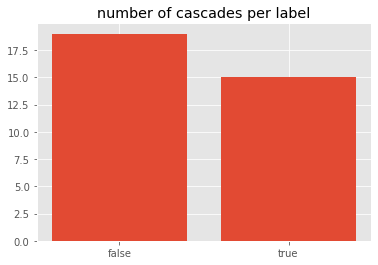

In [ ]:
y=[]
y.append(len(data_analysis["depth"][mask1]))
y.append(len(data_analysis_true["depth"][mask2]))
#y.append(len(data_analysis["depth"][mask3]))
#y.append(len(data_analysis["depth"][mask4]))
x=["false","true"]
plt.title("number of cascades per label")
plt.bar(x,y)
plt.show()

In [ ]:
x=[[1,1],[1,2],[2,3]]
x=np.array(x)
a=[]
maxi=np.max(x[:,0])
for y in range(0,maxi+1):
  mask=x[:,0]==y
  z=x[:,1]
  if len(z[mask])!=0:
    a.append([y,np.mean(z[mask])])

In [ ]:
a

[[1, 1.5], [2, 3.0]]